In [57]:
from abtem.utils import energy2wavelength

In [58]:
energy=30e3

In [83]:
import matplotlib
matplotlib.rcParams["image.interpolation"] = 'none'

matplotlib.rcParams.update({'figure.autolayout': True}),
matplotlib.pyplot.rcParams['figure.autolayout'] = True   #Automaticky nastaví velikost grafu, aby se vešel do obrazu,
matplotlib.pyplot.rcParams['figure.figsize'] = 12, 8     #Velikost obrázku - šířka, výška (v palcích),
matplotlib.pyplot.rcParams['axes.labelsize'] = 25        #Velikost názvů os,
matplotlib.pyplot.rcParams['axes.titlesize'] = 25        #Velikost nadpisu,
matplotlib.pyplot.rcParams['font.size'] = 25             #Velikost hodnot na osách,
matplotlib.pyplot.rcParams['lines.linewidth'] = 1      #Tloušťka čar,
matplotlib.pyplot.rcParams['lines.markersize'] = 12      #Velikost bodů,
matplotlib.pyplot.rcParams['legend.fontsize'] = 25       #Velikost textu v legendě,
#matplotlib.pyplot.rcParams['text.usetex'] = True         #LaTeX bude použit pro psaní všech textů,
#matplotlib.pyplot.rcParams['text.latex.unicode'] = True  #Použije latexové balíky pro unicode řetězce,
matplotlib.pyplot.rcParams['font.family'] = "serif"      #Nastaví rodinu fontů na 'serif',
#matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'
#matplotlib.pyplot.rcParams['font.serif'] = "m"          #Do této rodiny patří i např. Times New Roman,
matplotlib.pyplot.rcParams['xtick.major.pad'] = 10.0     #Vzdálenost čísel na x-ové ose od osy,
matplotlib.pyplot.rcParams['ytick.major.pad'] = 10.0     #Vzdálenost čísel na y-ové ose od osy

In [84]:
wavelength=energy2wavelength(energy)
def a2s(a): #angle to spatial frequency
    s=a*1e-3*1/wavelength
    return(s)

def s2a(s):
    a=s/(1/wavelength)*1e3
    return(a)

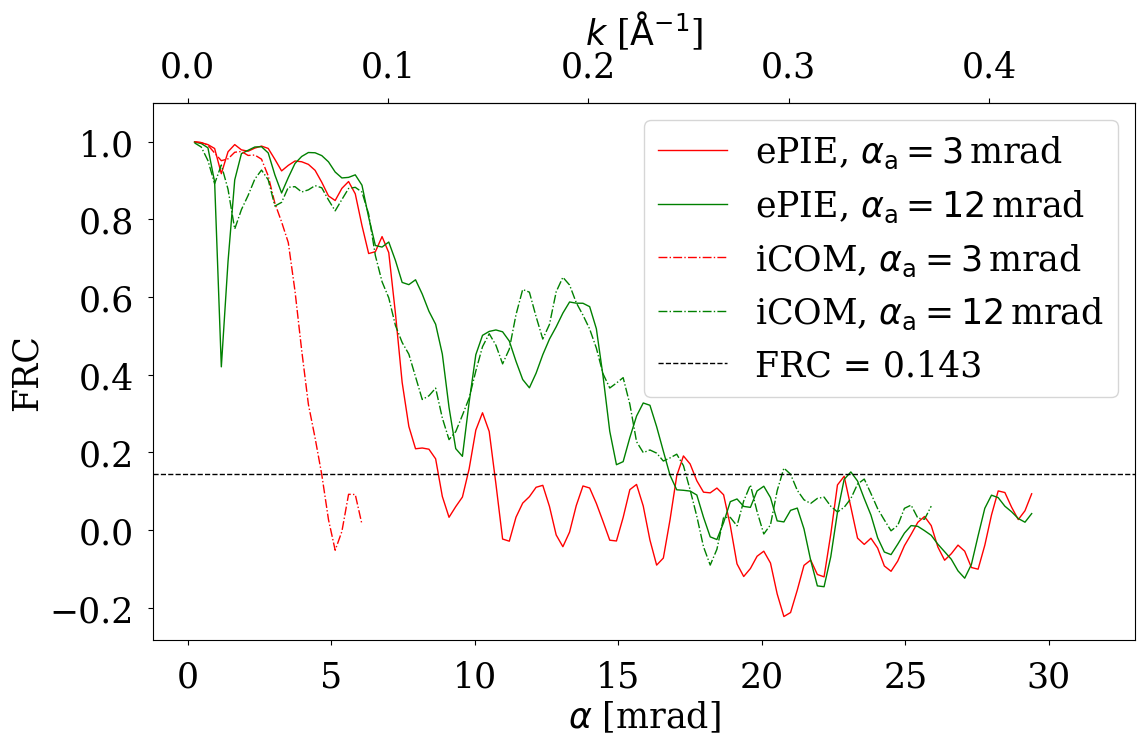

In [85]:
import matplotlib.pyplot as plt
import h5py
#ploting FRC for paper:
p_al_dl='figs/241111_tubes/hdfs/semiangle_3_dose_20.h5'
p_al_dh='figs/241111_tubes/hdfs/semiangle_3_dose_100.0.h5'
p_ah_dl='figs/241111_tubes/hdfs/semiangle_12_dose_20.h5'
p_ah_dh='figs/241111_tubes/hdfs/semiangle_12_dose_100.0.h5'

i_al_dl = 'figs/241114iCOM_nanotubes/hdfs_icom/semiangle_3_dose_20.h5'
i_al_dh = 'figs/241114iCOM_nanotubes/hdfs_icom/semiangle_3_dose_100.h5'
i_ah_dl = 'figs/241114iCOM_nanotubes/hdfs_icom/semiangle_12_dose_20.h5'
i_ah_dh = 'figs/241114iCOM_nanotubes/hdfs_icom/semiangle_12_dose_100.h5'


def load_frc(path):
    with h5py.File(path,'r') as f:
        x=f['frc_x'][()][0]
        y=f['frc_y'][()]
        semiangle=f['semiangle_cutoff'][()]
        dose=f['targeted_dose'][()]
    return(x,y,semiangle,dose)

fig_frc,ax_frc=plt.subplots(1,1)
x,y,semiangle,dose=load_frc(p_al_dl)
ax_frc.plot(x,y,label=r'ePIE, $\alpha_\mathrm{{a}} = {}\,$mrad'.format(semiangle,dose),color='r')
x,y,semiangle,dose=load_frc(p_ah_dl)
ax_frc.plot(x,y,label=r'ePIE, $\alpha_\mathrm{{a}} = {}\,$mrad'.format(semiangle,dose),color='g')
x,y,semiangle,dose=load_frc(i_al_dl)
ax_frc.plot(x,y,label=r'iCOM, $\alpha_\mathrm{{a}} = {}\,$mrad'.format(semiangle,dose),color='r',linestyle='-.')
x,y,semiangle,dose=load_frc(i_ah_dl)
ax_frc.plot(x,y,label=r'iCOM, $\alpha_\mathrm{{a}} = {}\,$mrad'.format(semiangle,dose),color='g',linestyle='-.')
ax_frc.set_xlabel(r"$\alpha$ [mrad]")
ax_frc.set_ylabel(r"FRC")
ax_frc.axhline(y=0.143,linestyle="--",color="k",label='FRC = 0.143')

secax_frc = ax_frc.secondary_xaxis('top', functions=(a2s, s2a))
secax_frc.set_xlabel(r'$k$ [$\mathrm{\AA}^{-1}$]')

plt.legend()
plt.xlim(None,33)
plt.ylim(None,1.1)
plt.savefig('figs/frc_dose_20_dual.pdf')

In [86]:
fig_frc,ax_frc=plt.subplots(1,1)
x,y,semiangle,dose=load_frc(p_al_dh)
ax_frc.plot(x,y,label=r'ePIE, $\alpha_\mathrm{{a}} = {}\,$mrad'.format(semiangle,dose),color='r')
x,y,semiangle,dose=load_frc(p_ah_dh)
ax_frc.plot(x,y,label=r'ePIE, $\alpha_\mathrm{{a}} = {}\,$mrad'.format(semiangle,dose),color='g')
x,y,semiangle,dose=load_frc(i_al_dh)
ax_frc.plot(x,y,label=r'iCOM, $\alpha_\mathrm{{a}} = {}\,$mrad'.format(semiangle,dose),color='r',linestyle='-.')
x,y,semiangle,dose=load_frc(i_ah_dh)
ax_frc.plot(x,y,label=r'iCOM, $\alpha_\mathrm{{a}} = {}\,$mrad'.format(semiangle,dose),color='g',linestyle='-.')
ax_frc.set_xlabel(r"$\alpha$ [mrad]")
ax_frc.set_ylabel(r"FRC")
ax_frc.axhline(y=0.143,linestyle="--",color="k",label='FRC = 0.143')

secax_frc = ax_frc.secondary_xaxis('top', functions=(a2s, s2a))
secax_frc.set_xlabel(r'$k$ [$\mathrm{\AA}^{-1}$]')

plt.legend()
plt.xlim(None,33)
plt.ylim(None,1.1)
plt.savefig('figs/frc_dose_100_dual.pdf')

In [88]:
7e-3*1/wavelength

0.10029973077332531